Instalations and imports for this script

In [1]:
pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
from google.colab import files
from keras import backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Input
from keras.layers.convolutional import Conv2D
from keras.layers.embeddings import Embedding
from keras.layers.merge import concatenate
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.utils.class_weight import compute_class_weight
from sqlalchemy import create_engine
import io
import keras.backend as K
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import tensorflow as tf

Using TensorFlow backend.


Source file download for loading the dataframe utilized in this script

In [4]:
!wget https://anonymous.4open.science/r/mac_gyver_predictor-D307/working_dataset_for_deep_learning.csv

--2022-06-02 19:53:32--  https://anonymous.4open.science/r/mac_gyver_predictor-D307/working_dataset_for_deep_learning.csv
Resolving anonymous.4open.science (anonymous.4open.science)... 104.21.18.195, 172.67.183.76, 2606:4700:3037::6815:12c3, ...
Connecting to anonymous.4open.science (anonymous.4open.science)|104.21.18.195|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /api/repo/mac_gyver_predictor-D307/file/working_dataset_for_deep_learning.csv [following]
--2022-06-02 19:53:32--  https://anonymous.4open.science/api/repo/mac_gyver_predictor-D307/file/working_dataset_for_deep_learning.csv
Reusing existing connection to anonymous.4open.science:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘working_dataset_for_deep_learning.csv.2’

working_dataset_for     [ <=>                ]   6.75K  --.-KB/s    in 0s      

2022-06-02 19:53:33 (72.2 MB/s) - ‘working_dataset_for_deep_learning.csv.2’ saved [6913]



Data pre-processing

In [5]:
working_deep_learning_base_dataset = pd.read_csv('/content/working_dataset_for_deep_learning.csv')

In [6]:
constituents = pd.DataFrame(working_deep_learning_base_dataset["Constituents"].str.split(',', expand=True).values)
constituents_one_hot_encoding = pd.get_dummies(constituents, prefix="Constituents")
emergent_behaviors = working_deep_learning_base_dataset.drop('Constituents', axis=1)

In [7]:
X = constituents_one_hot_encoding
y = emergent_behaviors

In [8]:
output_columns_binary = []

for col_name in emergent_behaviors.columns: 
    #print(col_name)
    output_columns_binary.append(col_name)

Definition and parametrization of the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

In [10]:
main_input = Input(shape=(68,))
x = Dropout(0.3)(main_input)
x = Dense(10, activation='relu')(x)
x = Dense(20, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dropout(0.3)(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
output_array = [] 
metrics_array = {}
loss_array = {}
for i, dense_layer in enumerate(output_columns_binary):
    name = f'binary_output_{i}' 
    # A Dense Layer is created for each output
    binary_output = Dense(1, activation='sigmoid', name=name)(x)
    output_array.append(binary_output)
    metrics_array[name] = 'binary_accuracy'
    loss_array[name] = 'binary_crossentropy'

In [12]:
model = Model(inputs=main_input, outputs=output_array)

In [13]:
y_train_output = []
for col in output_columns_binary:
    y_train_output.append(y_train[col])

In [14]:
weight_of_zeros = (constituents_one_hot_encoding == 0).sum().sum() + (emergent_behaviors == 0).sum().sum()

In [15]:
weight_of_ones = (constituents_one_hot_encoding == 1).sum().sum() + (emergent_behaviors == 1).sum().sum()

In [16]:
model.compile(optimizer='adadelta',
              loss=loss_array,
              metrics=metrics_array)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
weight_binary = {0: 1, 1: 14} #weighted values of zeros and ones
classes_weights = {}
for i, dense_layer in enumerate(output_columns_binary):
    name = f'binary_output_{i}'
    classes_weights[name] = weight_binary

classes_weights = dict(enumerate(classes_weights))

Execution of the model and exhibition of results and plots

In [18]:
history = model.fit(X_train, y_train_output, epochs=40, batch_size=512, class_weight=classes_weights, verbose=1)


Epoch 1/40
12/12 [==============================] - 5s 412ms/step - loss: 26.0479 - binary_output_0_loss: 0.7463 - binary_output_1_loss: 0.7672 - binary_output_2_loss: 0.6215 - binary_output_3_loss: 0.7906 - binary_output_4_loss: 0.7242 - binary_output_5_loss: 0.6795 - binary_output_6_loss: 0.5866 - binary_output_7_loss: 0.6273 - binary_output_8_loss: 0.6908 - binary_output_9_loss: 0.7006 - binary_output_10_loss: 0.6205 - binary_output_11_loss: 0.6274 - binary_output_12_loss: 0.8076 - binary_output_13_loss: 0.7456 - binary_output_14_loss: 0.7805 - binary_output_15_loss: 0.6454 - binary_output_16_loss: 0.6720 - binary_output_17_loss: 0.6987 - binary_output_18_loss: 0.7174 - binary_output_19_loss: 0.7324 - binary_output_20_loss: 0.8154 - binary_output_21_loss: 0.7724 - binary_output_22_loss: 0.7702 - binary_output_23_loss: 0.7181 - binary_output_24_loss: 0.6035 - binary_output_25_loss: 0.7452 - binary_output_26_loss: 0.6269 - binary_output_27_loss: 0.6418 - binary_output_28_loss: 0.7381

In [19]:
hist_df = pd.DataFrame(history.history)

In [20]:
df_acurracies = hist_df.iloc[:, 38:74]

In [21]:
n = len(df_acurracies)

In [22]:
accuracy = []
epoch = []

for i in range(n):
  epoch.append(i)
  accuracy.append(mean(df_acurracies.iloc[i].values))
  print('Epoch', i, '- Accuracy:', mean(df_acurracies.iloc[i].values))


Epoch 0 - Accuracy: 0.45370373
Epoch 1 - Accuracy: 0.4675926
Epoch 2 - Accuracy: 0.5046296
Epoch 3 - Accuracy: 0.52777773
Epoch 4 - Accuracy: 0.4861111
Epoch 5 - Accuracy: 0.47916666
Epoch 6 - Accuracy: 0.5694445
Epoch 7 - Accuracy: 0.55324066
Epoch 8 - Accuracy: 0.5833333
Epoch 9 - Accuracy: 0.5925926
Epoch 10 - Accuracy: 0.6273148
Epoch 11 - Accuracy: 0.59722227
Epoch 12 - Accuracy: 0.587963
Epoch 13 - Accuracy: 0.65509254
Epoch 14 - Accuracy: 0.6064815
Epoch 15 - Accuracy: 0.6157407
Epoch 16 - Accuracy: 0.6481481
Epoch 17 - Accuracy: 0.6828703
Epoch 18 - Accuracy: 0.6805556
Epoch 19 - Accuracy: 0.7106481
Epoch 20 - Accuracy: 0.6736111
Epoch 21 - Accuracy: 0.65277785
Epoch 22 - Accuracy: 0.63657403
Epoch 23 - Accuracy: 0.6736111
Epoch 24 - Accuracy: 0.6782408
Epoch 25 - Accuracy: 0.7083333
Epoch 26 - Accuracy: 0.6851852
Epoch 27 - Accuracy: 0.6875
Epoch 28 - Accuracy: 0.6967593
Epoch 29 - Accuracy: 0.72222227
Epoch 30 - Accuracy: 0.7037037
Epoch 31 - Accuracy: 0.7337963
Epoch 32 - Ac

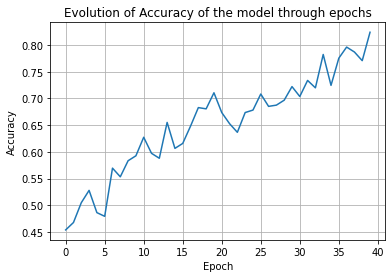

In [23]:
t = epoch
s = accuracy

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Evolution of Accuracy of the model through epochs')
ax.grid()

fig.savefig("accuracy_evolution.png")
plt.show()

Model summary

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 68)           0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 68)           0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           690         dropout_1[0][0]                  
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           220         dense_1[0][0]                    
____________________________________________________________________________________________

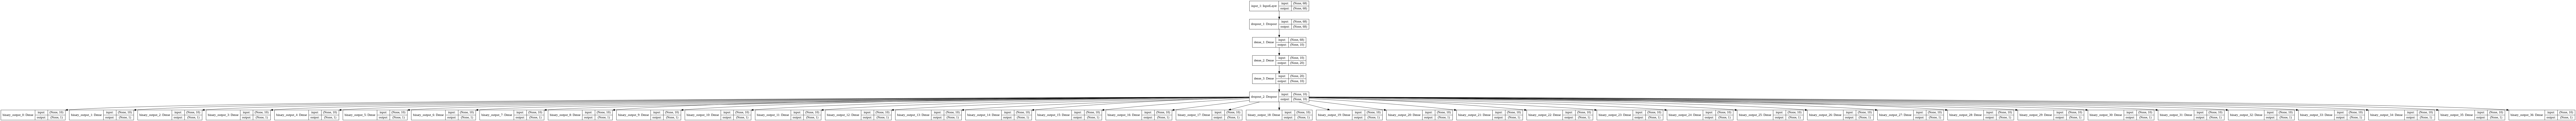

In [25]:
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

Evaluation for a new SoS, which does not exist in the original dataframe. It will be composed from the following constituents:

In [26]:
print(constituents_one_hot_encoding.columns[18])
print(constituents_one_hot_encoding.columns[44])
print(constituents_one_hot_encoding.columns[60])

Constituents_ 'Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload)'
Constituents_ 'one heating system'
Constituents_ 'Fire Detection CS'


This is equivalent to feeding the input of the algorithm with a vector of zeros, except for the indexes of these constituents:

In [27]:
new_SoS = np.zeros(68)
new_SoS[18] = 1
new_SoS[44] = 1
new_SoS[60] = 1

Predictions of the model and possible emergent behaviors derived from the algorithm:

In [28]:
row = new_SoS
newX = asarray([row])
yhat = model.predict(newX)

flat_list = []
for sublist in yhat:
    for item in sublist:
      for subitem in item:
        flat_list.append(subitem)

rounded_flat_list = []

for i in range(len(flat_list)):
  rounded_flat_list.append(flat_list[i].round())

possible_emergent_behaviors = []

for i in range(len(rounded_flat_list)):
  if (rounded_flat_list[i] == 1):
    possible_emergent_behaviors.append(output_columns_binary[i])

possible_emergent_behaviors

['supply power power to the electric load', 'minimum peak loads emerging']

Bibliography:

https://machinelearningmastery.com/keras-functional-api-deep-learning/

https://towardsdatascience.com/text-classifier-with-multiple-outputs-and-multiple-losses-in-keras-4b7a527eb858

https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704